In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel("studentTandF17.xlsx", sheet_name = "NewSheet", dtype={'zips': str, 'distance': object, 
                                                                          'totalDistance':object})

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [4]:
df.columns = ['zips', 'distance', 'totalDistance']

In [5]:
df.head(3)

,zips,distance,totalDistance
0,00824,Virgin Islands,Virgin Islands
1,00902,1573,1573
2,00913,Puerto Rico,Puerto Rico


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
zips             731 non-null object
distance         731 non-null object
totalDistance    731 non-null object
dtypes: object(3)
memory usage: 17.2+ KB


* First drop all rows with countries

In [7]:
print(df[df['distance'] == 'Virgin Islands'])
print(df[df['distance'] == 'Puerto Rico'])
print(df[df['distance'] == 'Spain'])
print(df[df['distance'] == 'Koloa'])

    zips        distance   totalDistance
0  00824  Virgin Islands  Virgin Islands
    zips     distance totalDistance
2  00913  Puerto Rico   Puerto Rico
      zips distance totalDistance
263  19198    Spain         Spain
      zips distance totalDistance
719  96756    Koloa         Koloa


* 4 rows dropeed from the dataframe

In [8]:
df.drop([0, 2, 263, 719], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 1 to 730
Data columns (total 3 columns):
zips             727 non-null object
distance         727 non-null object
totalDistance    727 non-null object
dtypes: object(3)
memory usage: 22.7+ KB


* Creating a buffer of 300 miles

In [9]:
df['car'] = df[df['distance'] <= 300]['distance']
df['airTravel'] = df[df['distance'] > 300]['distance']

In [10]:
df.head(3)

,zips,distance,totalDistance,car,airTravel
1,00902,1573,1573,NaN,1573
3,00921,1573,1573,NaN,1573
4,00966,1573,1573,NaN,1573


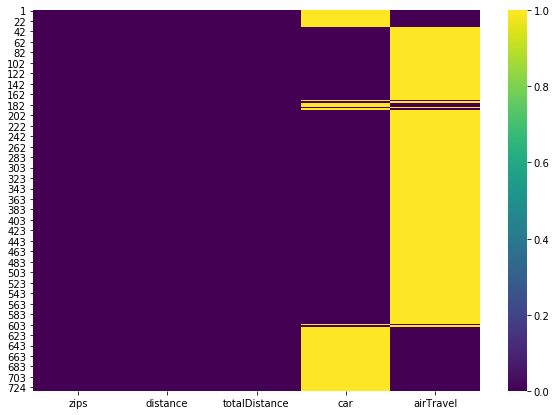

In [11]:
plt.figure(figsize=(10,7))  
sns.heatmap(df.isnull(), cmap = 'viridis')

In [12]:
df_copy = df.copy() 

In [13]:
df_copy.drop(['airTravel'], axis = 1, inplace = True) 

In [14]:
df_copy.head()

,zips,distance,totalDistance,car
1,00902,1573,1573,NaN
3,00921,1573,1573,NaN
4,00966,1573,1573,NaN
5,01104,316,316,NaN
6,01235,332,332,NaN


In [15]:
df_copy.dropna(inplace=True)

In [16]:
df_copy['totalDistance'] = 4*df['totalDistance']

In [17]:
print("Total miles covered by students who commute through car =", df_copy['totalDistance'].sum())

Total miles covered by students who commute through car = 419890.7999999998


* Total number of students in academic year 2017 = 1328
* Total number of students using air travel in 2017 = 170

In [18]:
print("Average passenger/miles of students who commute through car =", ((419890/4)/(1328-170))) 

Average passenger/miles of students who commute through car = 90.64982728842833


In [19]:
df_copy2 = df.copy()

In [20]:
df_copy2.drop(['car'], axis = 1, inplace = True) 

In [21]:
df_copy2.head()

,zips,distance,totalDistance,airTravel
1,00902,1573,1573,1573
3,00921,1573,1573,1573
4,00966,1573,1573,1573
5,01104,316,316,316
6,01235,332,332,332


In [22]:
df_copy2.dropna(inplace = True)

In [23]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 1 to 730
Data columns (total 4 columns):
zips             170 non-null object
distance         170 non-null object
totalDistance    170 non-null object
airTravel        170 non-null object
dtypes: object(4)
memory usage: 6.6+ KB


In [24]:
df_copy2['totalDistance'] = 4*df_copy2['totalDistance']

In [25]:
df_copy2.head(3)

,zips,distance,totalDistance,airTravel
1,00902,1573,6292,1573
3,00921,1573,6292,1573
4,00966,1573,6292,1573


In [26]:
print("Total miles covered by students who commute through air travel =", df_copy2['totalDistance'].sum()) 

Total miles covered by students who commute through air travel = 941092


In [27]:
print("Total distance of students who commute through air travel per trip =", 941092/4)

Total distance of students who commute through air travel per trip = 235273.0


In [28]:
print("Passenger/miles of students who use air travel", 235273/170)

Passenger/miles of students who use air travel 1383.9588235294118
